In [1]:
! pip install -q lalsuite
! pip install -q gwpy
! pip install -q pycbc
! pip install matplotlib==3.1.3 #I had to install an older version of matplotlib
                                #because the newest version would not make a correct plot

     |████████████████████████████████| 46.2 MB 133 kB/s 
     |████████████████████████████████| 1.4 MB 39.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51 kB 5.4 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 295 kB 41.0 MB/s 
     |████████████████████████████████| 3.6 MB 40.2 MB/s 
     |████████████████████████████████| 1.4 MB 5.8 MB/s 
     |████████████████████████████████| 11.2 MB 33.9 MB/s 
     |████████████████████████████████| 895 kB 34.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
     |████████████████████████████████| 6.7 MB 4.9 MB/s 
     |████████████████

In [2]:
! wget https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf #choose file name

from gwpy.timeseries import TimeSeries
gwpy_strain = TimeSeries.read('challenge2.gwf', channel="H1:CHALLENGE2") #filename

from pycbc import frame
pycbc_strain = frame.read_frame('challenge2.gwf', 'H1:CHALLENGE2') #filename

--2022-02-14 18:50:25--  https://www.gw-openscience.org/s/workshop3/challenge/challenge2.gwf
Resolving www.gw-openscience.org (www.gw-openscience.org)... 131.215.113.73
Connecting to www.gw-openscience.org (www.gw-openscience.org)|131.215.113.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4025842 (3.8M)
Saving to: ‘challenge2.gwf’

challenge2.gwf      100%[===================>]   3.84M  7.85MB/s    in 0.5s    

2022-02-14 18:50:26 (7.85 MB/s) - ‘challenge2.gwf’ saved [4025842/4025842]



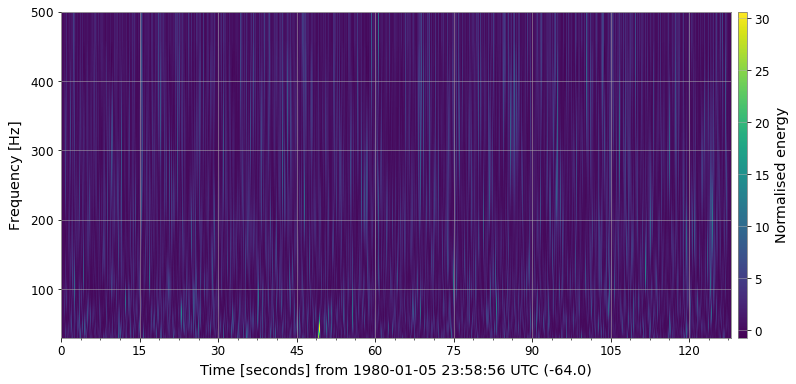

In [3]:
hq = gwpy_strain.q_transform(frange=(30, 500))
plot = hq.plot()
plot.colorbar(label="Normalised energy")

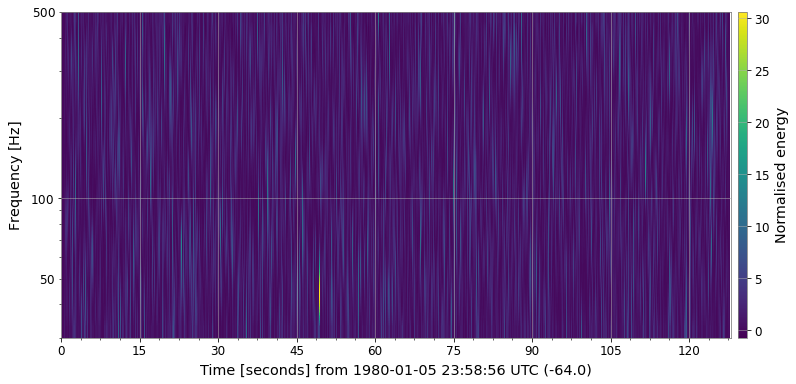

In [4]:
ax = plot.gca()
ax.set_ylim(30, 500)
ax.set_yscale("log")
plot 

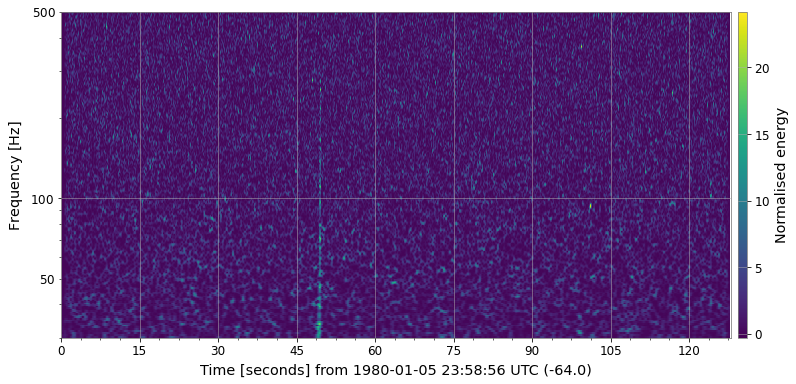

In [5]:
hq = gwpy_strain.q_transform(frange=(30, 500), qrange=(100, 120))
plot = hq.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

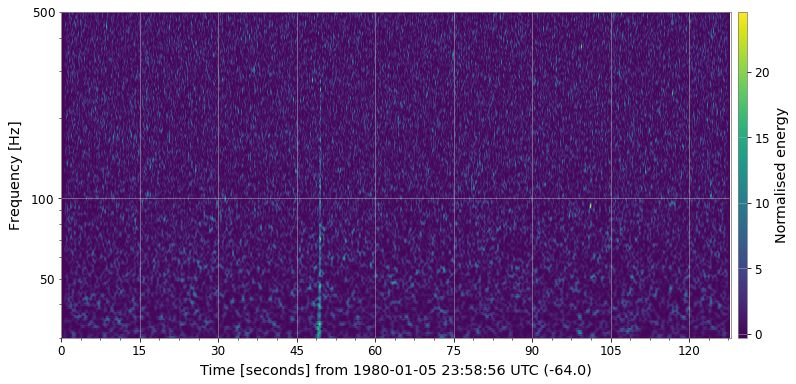

In [6]:
hq2 = gwpy_strain.q_transform(frange=(30, 500), qrange=(80, 110)) 
plot = hq2.plot()
ax = plot.gca()
ax.set_yscale('log')
ax.colorbar(label="Normalised energy")

The merger seems to occur around ~49s

In [7]:
%matplotlib inline

from pycbc.waveform import get_td_waveform
import pylab

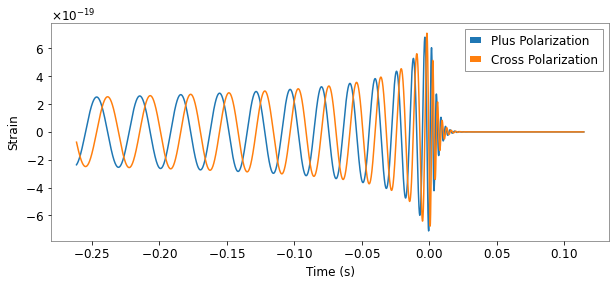

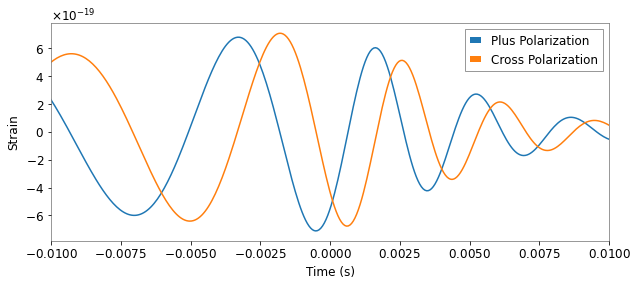

In [8]:
m=30 #solar masses are 30
s=0 #spins are 0
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m, 
                         mass2=m,
                         delta_t=1.0/16384,
                         f_lower=30,
                         spin1z=s, #spin
                         spin2z=s,
                         )

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.legend()
pylab.grid()
pylab.show()

pylab.figure(figsize=pylab.figaspect(0.4))
pylab.plot(hp.sample_times, hp, label='Plus Polarization')
pylab.plot(hp.sample_times, hc, label='Cross Polarization')
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')
pylab.xlim(-.01, .01)
pylab.legend()
pylab.grid()
pylab.show()

In [9]:
#Nyquist frequency is the sampling rate divided by 2
sr = gwpy_strain.sample_rate
print("Sampling rate is:", sr) #to see sample rate
print("Nyquist frequency is:", sr/2) #to see Nyquist Frequency

Sampling rate is: 4096.0 Hz
Nyquist frequency is: 2048.0 Hz


FrequencySeries([8.72299776e-25, 6.15773089e-25, 7.91661942e-28,
                 ..., 1.00335122e-23, 8.42635466e-24,
                 3.27127499e-24]
                unit: ct / Hz(1/2),
                f0: 0.0 Hz,
                df: 0.25 Hz,
                epoch: -64.0,
                name: H1:CHALLENGE2,
                channel: H1:CHALLENGE2)


(1e-24, 1e-20)

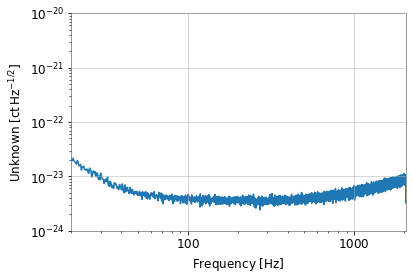

In [10]:
asd = gwpy_strain.asd(fftlength=4, method="median")
print(asd) #this is the PSD
plot = asd.plot()
ax = plot.gca()
ax.set_xlim(20, 2048) #start at 20, ends at 2048
ax.set_ylim(1e-24, 1e-20) #both axis are log
